In [1]:
import scipy.optimize as spo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fm((x, y)):
    return np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

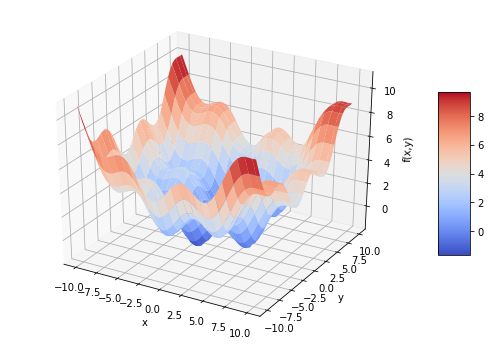

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [4]:
global_opt = spo.brute(fm, ((-10.0,10.0,0.1),(-10.0,10.0,0.1)), finish=None)
global_opt

array([-1.4, -1.4])

In [5]:
fm(global_opt)

-1.7748994599769203

In [6]:
local_opt = spo.fmin(fm, global_opt, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
local_opt

array([-1.42702972, -1.42876755])

In [7]:
fm(local_opt)

-1.7757246992239009

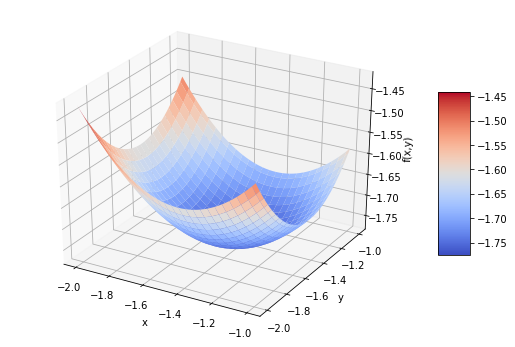

In [8]:
x = np.linspace(-2, -1, 50)
y = np.linspace(-2, -1, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [9]:
# local opt without global opt to give starting point can yield poor results
spo.fmin(fm,(2.0, 2.0), maxiter=250)


Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

# Constrained optimisation
Consider the utility maximization problem of an (expected utility maximizing) investor who can invest in two risky securities. Both securities cost $q_{a}$ = $q_{b}$ = 10 today. After one year, they have a payoff of 15 USD and 5 USD, respectively, in state u, and of 5 USD and 12 USD, respectively, in state d. Both states are equally likely. Denote the vector payoffs for the two securities by $r_{a}$ and $r_{b}$, respectively. The investor has a budget of $w_{0}$ = 100 USD to invest and derives utility from future wealth according to the utility function $u(w) = \sqrt(w)$, where w is the wealth (USD amount) available


Expected utility maximizing problem

$$max(E(u(w_{1}) = p\sqrt(w_{1u}) + (1-p)\sqrt(w_{1d})$$

$$w_{1} = ar_{a} + br_{b}$$

$$w_{0} >= aq_{a} + bq_{b}$$

$$a,b>=0$$

Restated with actual parameters as a minimisation problem

$$min(-E(u(w_{1}) = -(0.5.\sqrt(w_{1u}) + (0.5)\sqrt(w_{1d}))$$

$$w_{1u} = a.15 + b.5$$

$$w_{1d} = a.5 + b.12$$

$$100 >= a.10 + b.10$$

$$a,b>=0$$

In [11]:
def Eu((a,b)):
    return -(0.5*np.sqrt(a*15+b*5)+0.5*np.sqrt(a*5+b*12))

# inequality rexpressed as >= 0
cons = ({'type':'ineq', 'fun' : lambda (a,b): 100-a*10-b*10})
bnds = ((0,100),(0,1000))

result = spo.minimize(Eu, [5,5], method='SLSQP', bounds=bnds, constraints=cons)

In [12]:
result

     fun: -9.7008836114878321
     jac: array([-0.48508096, -0.48489535,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [14]:
# check solution is consistent with initial prices and capital
np.dot(result['x'],[10,10])

99.999999999999986